# Лабораторная работа 3
## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор /гиперпараметров на примере метода ближайших соседей.


## Цель лабораторной работы: изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

Требования к отчету:
Отчет по лабораторной работе должен содержать:

* титульный лист;
* описание задания;
* текст программы;
* экранные формы с примерами выполнения программы.
## Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
Сравните метрики качества исходной и оптимальной моделей.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 
# sns.set(style="ticks")

In [28]:
df = pd.read_csv('./KNNDataset.csv', sep=',')

In [29]:
#Удалим данный столбец поскольку он не имеет важности для обучения
df.drop('Unnamed: 32', axis= 1 , inplace= True )

In [30]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(df)

id имеет NAN: 0
diagnosis имеет NAN: 0
radius_mean имеет NAN: 0
texture_mean имеет NAN: 0
perimeter_mean имеет NAN: 0
area_mean имеет NAN: 0
smoothness_mean имеет NAN: 0
compactness_mean имеет NAN: 0
concavity_mean имеет NAN: 0
concave points_mean имеет NAN: 0
symmetry_mean имеет NAN: 0
fractal_dimension_mean имеет NAN: 0
radius_se имеет NAN: 0
texture_se имеет NAN: 0
perimeter_se имеет NAN: 0
area_se имеет NAN: 0
smoothness_se имеет NAN: 0
compactness_se имеет NAN: 0
concavity_se имеет NAN: 0
concave points_se имеет NAN: 0
symmetry_se имеет NAN: 0
fractal_dimension_se имеет NAN: 0
radius_worst имеет NAN: 0
texture_worst имеет NAN: 0
perimeter_worst имеет NAN: 0
area_worst имеет NAN: 0
smoothness_worst имеет NAN: 0
compactness_worst имеет NAN: 0
concavity_worst имеет NAN: 0
concave points_worst имеет NAN: 0
symmetry_worst имеет NAN: 0
fractal_dimension_worst имеет NAN: 0


In [34]:
#Разобьем дату на target и данные для обучения
data_target = df.diagnosis
df.drop (df.columns [[1]], axis= 1 , inplace= True )
data_train = df

In [35]:
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    data_train, data_target, test_size=0.3, random_state=1)

In [36]:
# В моделях k-ближайших соседей большое значение k 
# ведёт к большому смещению и низкой дисперсии (недообучению)
# 20 ближайших соседей
cl1_1 = KNeighborsClassifier(n_neighbors=10)
cl1_1.fit(X_train, y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(y_train, target1_0), accuracy_score(y_test, target1_1)

(0.7160804020100503, 0.7309941520467836)

In [49]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=40), 
                         data_train, data_target, cv=3)
print(scores, np.mean(scores))

[0.49473684 0.52631579 0.61904762] 0.5467000835421888


# Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели.

# Стратегии валидации

## 1) стратегия валидации k-fold https://www.codecamp.ru/blog/cross-validation-k-fold/



### Существуют три подхода для выбора значения параметра k:

### Представитель: Значение для k выбрано таким образом, что каждая группа подборка/тестовая группа данных достаточно велика, чтобы быть статистически репрезентативной для более широкого набора данных.
### k=10: Значение для k фиксируется до 10. Данное число было найдено в ходе экспериментов и обычно приводит к оценке качества модели с низкой предвзятостью небольшую дисперсии.
### k = n: Значение для k фиксируется на n, где n является размером набора данных, чтобы дать каждому тестовой группе возможность быть использованной в наборе данных.
### k выбирают обычно 5 или 10, но нет формального правила. По мере того как k становится больше, разница в размере между тестовой выборкой и подмножествами resampling становится мала. По мере уменьшения этой разницы предвзятость к технике становится меньше.

### Если выбрано значение для k, которое не делит датасет равномерно, то одна группа будет содержать оставшуюся часть примеров. Предпочтительно разделить исходный датасет на группы k с одинаковым количеством данных, так что выборка оценки качества моделей была эквивалентна.

In [54]:
kf = KFold(n_splits=5)
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_train, data_target, scoring='f1_weighted', 
                         cv=kf)
print(scores)

[0.26903969 0.56829463 0.5499232  0.64738856 0.69023255]


## 2) стратегия валидации Leave One Out (LOO) https://www.helenkapatsa.ru/poeliemientnaia/

### В тестовую выборку помещается единственный элемент (One Out). Количество фолдов в этом случае определяется автоматически и равняется количеству элементов.

### Данный метод более ресурсоемкий чем KFold.

### Существует эмпирическое правило, что вместо Leave One Out лучше использовать KFold на 5 или 10 фолдов.

In [57]:
kf = LeaveOneOut()
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_train, data_target, scoring='f1_weighted', 
                         cv=kf)
print(scores)
print(np.mean(scores))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.

# Подбор гиперпараметра K

## 1) Grid Search (решетчатый поиск) https://academy.yandex.ru/handbook/ml/article/podbor-giperparametrov

In [60]:
knn = KNeighborsClassifier() # модель мо
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31)) # список гиперпараметров
param_grid = dict(n_neighbors=k_range)
kf = KFold(n_splits=5) #стратегия валидации
# создание grid search
grid = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=False,verbose=1)
  
# обучение для подбора гиперпараметра с помощью grid search
grid_search= grid.fit(data_train, data_target)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [73]:
grid_search.cv_results_

{'mean_fit_time': array([0.00129271, 0.00117097, 0.00142884, 0.00117373, 0.00116873,
        0.00115886, 0.00115895, 0.00115342, 0.00139713, 0.00151653,
        0.00143232, 0.00137696, 0.00120659, 0.00138726, 0.00115986,
        0.00115466, 0.00115991, 0.00116968, 0.00115604, 0.00117979,
        0.00114808, 0.00121713, 0.00143447, 0.00117202, 0.00117636,
        0.00115123, 0.00115213, 0.00131354, 0.00122724, 0.00116506]),
 'std_fit_time': array([1.72843440e-04, 3.18898909e-05, 2.16596685e-04, 2.02664207e-05,
        1.92071286e-05, 2.60127672e-06, 7.44385416e-06, 4.11132084e-06,
        2.27153131e-04, 3.23099890e-04, 3.09888710e-04, 2.06155989e-04,
        7.24371047e-05, 2.78762306e-04, 7.08612747e-06, 2.22126287e-06,
        8.07391062e-06, 1.58321426e-05, 8.28023297e-06, 4.08548445e-05,
        6.67333560e-06, 1.12383751e-04, 2.92353159e-04, 1.67507675e-05,
        1.97533786e-05, 4.72189185e-06, 5.37071918e-06, 2.39850399e-04,
        6.94725066e-05, 2.17176163e-05]),
 'mean_scor

In [74]:
print(grid_search.best_params_)
print(grid_search.best_score_ * 100)

{'n_neighbors': 7}
65.74910728147805


Text(0, 0.5, 'обучаемость модели')

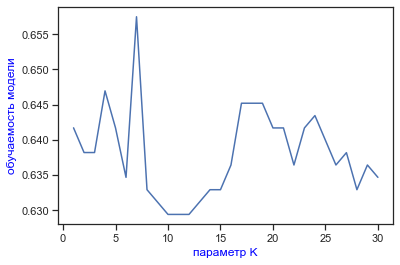

In [66]:
plt.plot(k_range, grid_search.cv_results_['mean_test_score'])
plt.xlabel('параметр K', fontsize=12, color='blue')
plt.ylabel('обучаемость модели', fontsize=12, color='blue')

## 2) RandomizedSearch https://academy.yandex.ru/handbook/ml/article/podbor-giperparametrov

In [84]:
knn = KNeighborsClassifier() # модель мо
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31)) # список гиперпараметров
param_random_search = dict(n_neighbors=k_range)
kf = KFold(n_splits=5)#стратегия валидации
# создание random search
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_random_search, cv=kf, scoring='accuracy')
# обучение для подбора гиперпараметра с помощью random search
random_search.fit(data_train, data_target)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   scoring='accuracy')

In [85]:
random_search.cv_results_

{'mean_fit_time': array([0.00181026, 0.00140438, 0.00116601, 0.00116029, 0.00124249,
        0.00118337, 0.00116725, 0.00117731, 0.00116835, 0.00116944]),
 'std_fit_time': array([2.48152737e-04, 1.49237812e-04, 8.36927323e-06, 6.38071550e-06,
        7.88999955e-05, 3.63369313e-05, 1.18840601e-05, 3.73659041e-05,
        1.16142889e-05, 8.56052192e-06]),
 'mean_score_time': array([0.0039063 , 0.00324302, 0.00287957, 0.00285325, 0.00294299,
        0.0028873 , 0.00284386, 0.00294585, 0.00282855, 0.00282073]),
 'std_score_time': array([3.40805541e-04, 4.24663833e-04, 3.06196295e-05, 1.87861737e-05,
        2.13470490e-04, 5.10697717e-05, 5.63931259e-05, 1.36300079e-04,
        2.96941319e-05, 3.32489219e-05]),
 'param_n_neighbors': masked_array(data=[5, 14, 24, 15, 7, 26, 16, 23, 13, 8],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_ne

In [86]:
print(random_search.best_params_)
print(random_search.best_score_ * 100)

{'n_neighbors': 7}
65.74910728147805


### Сравните метрики качества исходной и оптимальной моделей.
### Строится зависимость метрики на обучающей выборке от размера выборки.

<module 'matplotlib.pyplot' from '/home/vlad/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

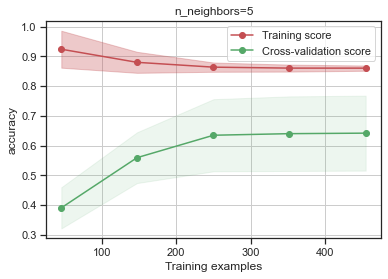

In [90]:
from sklearn.model_selection import learning_curve, validation_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    data_train, data_target, cv=kf)

# Метрики качества классификации

## Матрица ошибок или Confusion Matrix

In [96]:
target_predict = grid_search.predict(data_train)

In [101]:
cm = confusion_matrix(data_target, target_predict)

In [102]:
cm

array([[348,   9],
       [ 97, 115]])

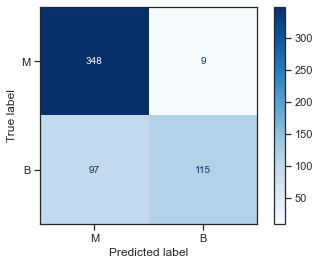

In [104]:
ConfusionMatrixDisplay(cm, display_labels=['M', 'B']).plot(cmap="Blues")

In [107]:
target1_1 = cl1_1.predict(data_train)

In [108]:
cm = confusion_matrix(data_target, target1_1)

In [109]:
cm

array([[342,  15],
       [144,  68]])

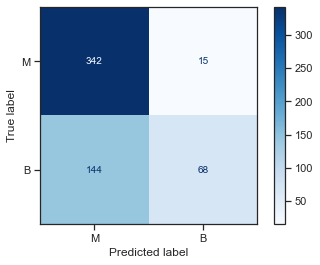

In [110]:
ConfusionMatrixDisplay(cm, display_labels=['M', 'B']).plot(cmap="Blues")

#  Вывод: 
Посмотрев на две матрицы, можно сделать вывод,что оптимальная можель намного лучше